In [ ]:
from pathlib import Path
from pioneerml.zenml import load_step_output
from pioneerml.zenml import utils as zenml_utils
from pioneerml.zenml.pipelines.training import group_splitter_optuna_pipeline
from pioneerml.optuna import OptunaStudyManager
from pioneerml.data import NODE_LABEL_TO_NAME, NUM_NODE_CLASSES

PROJECT_ROOT = zenml_utils.find_project_root()
zenml_client = zenml_utils.setup_zenml_for_notebook(root_path=PROJECT_ROOT, use_in_memory=True)
print(f"ZenML ready with stack: {zenml_client.active_stack_model.name}")

# Set up Optuna storage
optuna_manager = OptunaStudyManager(
    project_root=PROJECT_ROOT,
    study_name="group_splitter",
)
optuna_storage = optuna_manager.resolve_storage()
print(f"Using Optuna storage: {optuna_storage}")


Using ZenML repository root: /home/jack/python_projects/pioneerML
Ensure this is the top-level of your repo (.zen must live here).
ZenML ready with stack: default
Using Optuna storage: sqlite:////home/jack/python_projects/pioneerML/.optuna/group_splitter.db


In [ ]:
# Configure the pipeline
file_pattern = str(Path(PROJECT_ROOT) / 'data' / 'mainTimeGroups_*.npy')
run = group_splitter_optuna_pipeline.with_options(enable_cache=False)(
    build_datamodule_params={
        'file_pattern': file_pattern,
        'max_files': 1,
        'limit_groups': 1000,
        'min_hits': 3,
        'use_group_probs': False,
        'batch_size': 8,
        'num_workers': None,
        'val_split': 0.15,
        'seed': 42,
    },
    run_hparam_search_params={
        'n_trials': 1,
        'max_epochs': 1,
        'limit_train_batches': 0.4,
        'limit_val_batches': 1.0,
        'storage': optuna_storage,
        'study_name': 'group_splitter',
    },
    train_best_model_params={
        'max_epochs': 5,
        'early_stopping': True,
        'early_stopping_patience': 6,
        'early_stopping_monitor': 'val_loss',
        'early_stopping_mode': 'min',
    },
)
print(f"Run name: {run.name}")
print(f"Run status: {run.status}")


Initiating a new run for the pipeline: group_splitter_optuna_pipeline.
Caching is disabled by default for group_splitter_optuna_pipeline.
Using user: default
Using stack: default
  artifact_store: default
  deployer: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Step build_splitter_datamodule has started.


[build_splitter_datamodule] Auto-detected num_workers: 11 (from 12 CPU cores, using cores-1)
[build_splitter_datamodule] Starting to load data from: /home/jack/python_projects/pioneerML/data/mainTimeGroups_*.npy
[build_splitter_datamodule] Limiting to 1 files (from 11 total files found, max_files=1)
[build_splitter_datamodule] Loaded 777 groups. Building datamodule...
[build_splitter_datamodule] Calling setup(stage='fit')...
[build_splitter_datamodule] Setup complete. Train: 661, Val: 116


[build_splitter_datamodule] Loaded 777 splitter groups from 1 files; pion_hits=284524, muon_hits=61120, mip_hits=386226, total_hits=731870
Step build_splitter_datamodule has finished in 1.958s.
Step run_splitter_hparam_search has started.


[run_splitter_hparam_search] Using GPU: NVIDIA GeForce RTX 5070
[run_splitter_hparam_search] CUDA devices: 1
[run_splitter_hparam_search] Enabled Tensor Core optimization (medium precision)
[run_splitter_hparam_search] Dataset sizes - Train: 661, Val: 116
[run_splitter_hparam_search] Starting Optuna search with 1 trials, 1 epochs per trial...
[I 2025-12-07 14:30:19,255] A new study created in RDB with name: group_splitter
[run_splitter_hparam_search] Starting Optuna study (storage=sqlite:////home/jack/python_projects/pioneerML/.optuna/group_splitter.db, name=group_splitter)...


  0%|          | 0/1 [00:00<?, ?it/s]

[run_splitter_hparam_search] Trial 1/1 (cumulative 1/1) starting...
[run_splitter_hparam_search] Trial 1 params: batch_size=4, hidden=189 (from 192), heads=7, layers=4, dropout=0.0990, lr=0.000161, weight_decay=0.000938
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
[run_splitter_hparam_search] Trial 1 training 1 epochs...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  1.7 M │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 1.7 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.7 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 69                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


[run_splitter_hparam_search] Trial 1 validating...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

[run_splitter_hparam_search] Trial 1 completed with score: 0.900721
[run_splitter_hparam_search] Optuna search complete! Best score: 0.900721
[run_splitter_hparam_search] Best params: {'batch_size': 4, 'heads': 7, 'hidden': 192, 'layers': 4, 'dropout': 0.09902375280917053, 'lr': 0.00016110998982979185, 'weight_decay': 0.000938338170401105}


[I 2025-12-07 14:30:27,717] Trial 0 finished with value: 0.9007207155227661 and parameters: {'batch_size': 4, 'heads': 7, 'hidden': 192, 'layers': 4, 'dropout': 0.09902375280917053, 'lr': 0.00016110998982979185, 'weight_decay': 0.000938338170401105}. Best is trial 0 with value: 0.9007207155227661.
Step run_splitter_hparam_search has finished in 9.047s.
Step train_best_splitter has started.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  1.7 M │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 1.7 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.7 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 69                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Step train_best_splitter has finished in 36.881s.
Step collect_splitter_predictions has started.
Step collect_splitter_predictions has finished in 2.007s.
Pipeline run has finished in 51.420s.
Run name: group_splitter_optuna_pipeline-2025_12_07-19_30_15_976540
Run status: completed


In [3]:
# Load artifacts from the pipeline run
trained_module = load_step_output(run, "train_best_splitter")
datamodule = load_step_output(run, "build_splitter_datamodule")
predictions = load_step_output(run, "collect_splitter_predictions", index=0)
targets = load_step_output(run, "collect_splitter_predictions", index=1)
best_params = load_step_output(run, "run_splitter_hparam_search")

if trained_module is None or datamodule is None:
    raise RuntimeError("Could not load artifacts from the optuna pipeline run.")

datamodule.setup(stage="fit")
trained_module.eval()
device = next(trained_module.parameters()).device
val_size = len(datamodule.val_dataset) if datamodule.val_dataset is not None else len(datamodule.train_dataset)
print(f"Loaded module on {device}; validation samples: {val_size}")
print("Best params from Optuna:", best_params)
print("Epochs actually run:", getattr(trained_module, "final_epochs_run", None))


Loaded module on cpu; validation samples: 116
Best params from Optuna: {'batch_size': 4, 'heads': 7, 'hidden': 192, 'layers': 4, 'dropout': 0.09902375280917053, 'lr': 0.00016110998982979185, 'weight_decay': 0.000938338170401105, 'best_score': 0.9007207155227661, 'n_trials': 1} {'batch_size': 4, 'heads': 7, 'hidden': 192, 'layers': 4, 'dropout': 0.09902375280917053, 'lr': 0.00016110998982979185, 'weight_decay': 0.000938338170401105, 'best_score': 0.9007207155227661, 'n_trials': 1}
Epochs actually run: 6 6


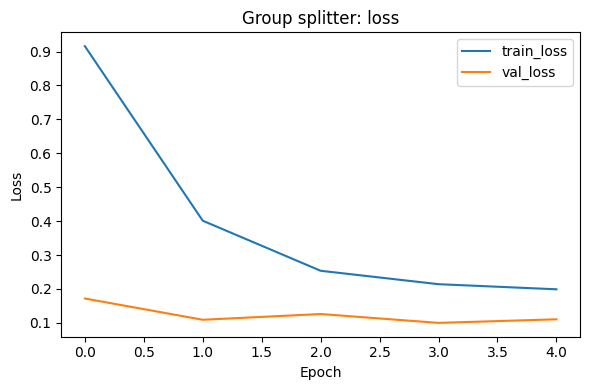

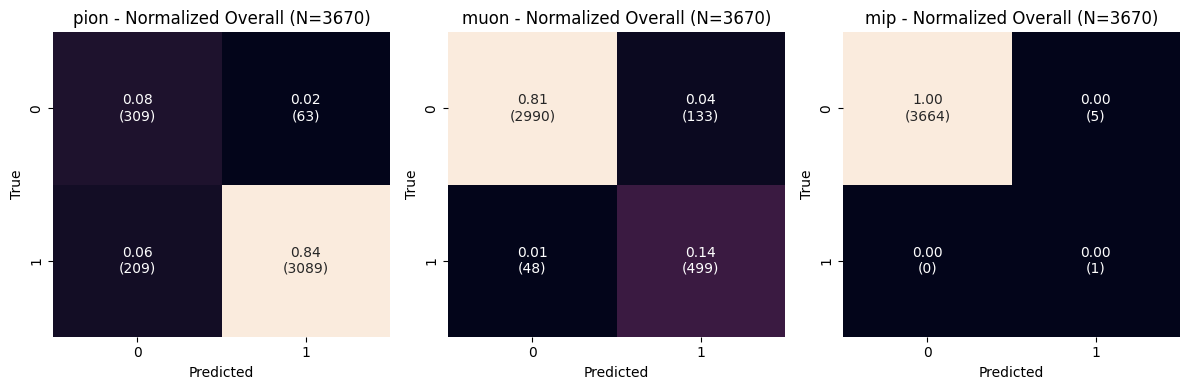

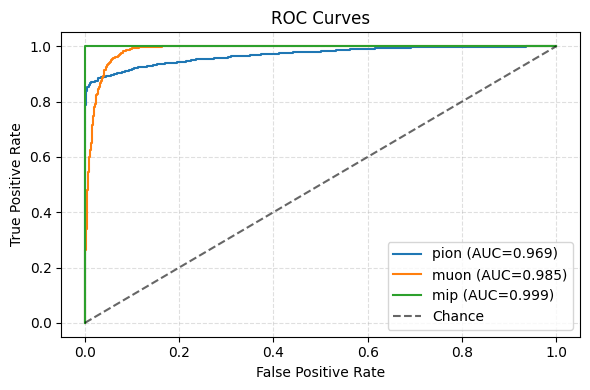

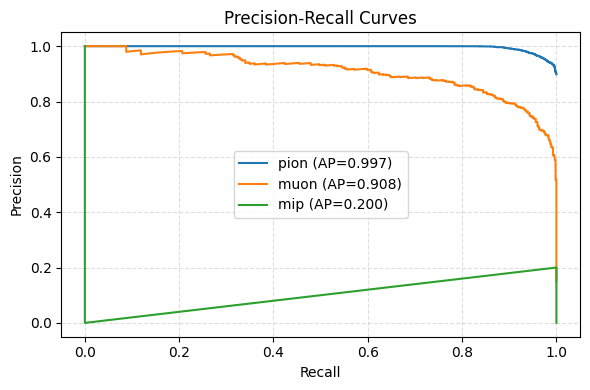

In [4]:
from pioneerml.evaluation.plots import (
    plot_loss_curves,
    plot_multilabel_confusion_matrix,
    plot_precision_recall_curves,
    plot_roc_curves,
)

class_names = list(NODE_LABEL_TO_NAME.values())

# Loss curves
plot_loss_curves(trained_module, title="Group splitter: loss", show=True)

# Classification diagnostics
plot_multilabel_confusion_matrix(
    predictions=predictions,
    targets=targets,
    class_names=class_names,
    threshold=0.5,
    normalize=True,
    show=True,
)
plot_roc_curves(predictions, targets, class_names=class_names, show=True)
plot_precision_recall_curves(predictions, targets, class_names=class_names, show=True)


In [6]:
from pioneerml.metadata import TrainingMetadata, save_model_and_metadata, timestamp_now

# Build metadata and save model + metadata together
save_ts = timestamp_now()

class_names = list(NODE_LABEL_TO_NAME.values())

meta = TrainingMetadata(
    model_type="GroupSplitter",
    timestamp=save_ts,
    run_name=run.name if 'run' in locals() else None,
    best_hyperparameters=best_params,
    best_score=best_params.get('best_score') if isinstance(best_params, dict) else None,
    n_trials=best_params.get('n_trials') if isinstance(best_params, dict) else None,
    training_config=getattr(trained_module, 'training_config', {}),
    epochs_run=getattr(trained_module, 'final_epochs_run', None),
    dataset_info={
        'train_size': len(datamodule.train_dataset) if datamodule.train_dataset else 0,
        'val_size': len(datamodule.val_dataset) if datamodule.val_dataset else 0,
        'num_classes': NUM_NODE_CLASSES,
        'class_names': class_names,
    },
    model_architecture={
        'num_classes': NUM_NODE_CLASSES,
        'hidden': best_params.get('hidden') if isinstance(best_params, dict) else None,
        'heads': best_params.get('heads') if isinstance(best_params, dict) else None,
        'layers': best_params.get('layers') if isinstance(best_params, dict) else None,
        'dropout': best_params.get('dropout') if isinstance(best_params, dict) else None,
    },
    # Store link to Optuna DB instead of full history
    optuna_storage=optuna_storage,
    optuna_study_name=optuna_manager.study_name,
)

paths = save_model_and_metadata(
    model=trained_module.model,
    metadata=meta,
    state_dict_only=True,
)

print("Saved artifacts:")
for k, v in paths.items():
    print(f"  {k}: {v}")


Saved artifacts:
  dir: /home/jack/python_projects/pioneerML/trained_models/groupsplitter
  state_dict: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20251207_193129_group_splitter_optuna_pipeline-2025_12_07-19_30_15_976540_state_dict.pt
  metadata: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20251207_193129_group_splitter_optuna_pipeline-2025_12_07-19_30_15_976540_metadata.json
  full_checkpoint: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20251207_193129_group_splitter_optuna_pipeline-2025_12_07-19_30_15_976540_checkpoint.pt
